In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%pip install -q decorator==5.0.9
!pip install -q ipywidgets

import csv
import math
import re
import imp
import json
import base64
import numpy as np
import pandas as pd
import difflib as dl
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q cltk==1.0.22
%pip install -q strsim
%pip install -q leven

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [373]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import features.count_vectorizer.n_gram as thesisCountVectorizerNgramFeatures
import similarities.cosine as thesisCosineSimilarities
import similarities.levenshtein as thesisLevenshteinSimilarities
import vocabulary.vocabulary as thesisVocabulary
import features.lexical as thesisLexicalFeatures
import similarities.cosine as thesisCosineSimilarity
import text_cleanup.text_cleanup as thesisTextCleanUp
import p_aligment.p_aligment as thesisPAligment
import features.model_features as thesisModelFeatures

imp.reload(thesisTfIdfNgramFeatures)
imp.reload(thesisLexicalFeatures)
imp.reload(thesisCosineSimilarity)
imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

imp.reload(thesisVocabulary)
imp.reload(thesisCosineSimilarities)
imp.reload(thesisTextCleanUp)
imp.reload(thesisCountVectorizerNgramFeatures)
imp.reload(thesisPAligment)
imp.reload(thesisLevenshteinSimilarities)
imp.reload(thesisModelFeatures)

<module 'features.model_features' from '../src/features/model_features.py'>

In [5]:
london_poorly_similar_with_chops_corpus_without_word_processing = thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
    thesisDataReader.get_london_poorly_similar_with_chops_corpus(),
    thesisVocabulary.create_london_pre_post_processing_map()
)
zwickau_poorly_similar_with_chops_corpus_without_word_processing = thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
    thesisDataReader.get_zwickau_poorly_similar_with_chops_corpus(),
    thesisVocabulary.create_zwickau_pre_post_processing_map()
)

In [6]:
london_poorly_similar_with_chops_corpus_without_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, london_poorly_similar_with_chops_corpus_without_word_processing))
len(london_poorly_similar_with_chops_corpus_without_word_processing_long_p)

157

In [7]:
zwickau_poorly_similar_with_chops_corpus_without_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, zwickau_poorly_similar_with_chops_corpus_without_word_processing))
len(zwickau_poorly_similar_with_chops_corpus_without_word_processing_long_p)

166

In [8]:
burchard_candidate_version_based_london_without_word_processing = thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
    thesisDataReader.get_burchard_candidate_version_based_on_strongly_similar_zwickau_base(),
    thesisVocabulary.create_zwickau_pre_post_processing_map()
)

In [9]:
print(len(burchard_candidate_version_based_london_without_word_processing))
burchard_candidate_version_based_london_without_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, burchard_candidate_version_based_london_without_word_processing))
len(burchard_candidate_version_based_london_without_word_processing_long_p)

217


207

In [12]:
burchard_london_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_features_df(
    london_poorly_similar_with_chops_corpus_without_word_processing_long_p,
    None,
    burchard_candidate_version_based_london_without_word_processing_long_p,
    n_gram = (2,5),
    features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
#     burchard_version_with_original_london_text
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [13]:
burchard_london_features_tfidf_2_5_gram_cosine_similarity_long_p_df

,index,corpus_version_label,a,a,a b,a be,a c,a ca,a ce,a ch,...,zuri,zurio,zy,zyd,zyda,zyda,zyp,zyph,zyph,inner_mean_cosine_similarity_score
0,0.0,0.0,0.018325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078201
1,1.0,0.0,0.010313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090889
2,2.0,0.0,0.009518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105741
3,3.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108059
4,4.0,0.0,0.057770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,202.0,2.0,0.050451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.229550
360,203.0,2.0,0.044633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154216
361,204.0,2.0,0.043195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250562
362,205.0,2.0,0.035188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203420


In [14]:
burchard_london_tf_idf_2_5_cosine_results_long_p = thesisModelFeatures.run_models(burchard_london_features_tfidf_2_5_gram_cosine_similarity_long_p_df)

running: SVM_linear


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaco

running: SVM_RBF
running: DecisionTreeClassifier
running: GaussianProcessClassifier
running: RandomForestClassifier
running: MLPClassifier
running: GaussianNB
running: KNeighborsClassifier
running: AdaBoostClassifier


In [15]:
burchard_london_tf_idf_2_5_cosine_results_long_p[0].sort_values(by=['accuracy'], ascending=False)

,precision_macro,recall_macro,f1_macro,f1_micro,f1_weighted,accuracy
GaussianProcessClassifier,0.784533,0.746458,0.745451,0.763138,0.753996,0.763138
MLPClassifier,0.781945,0.742827,0.742405,0.760586,0.751301,0.760586
AdaBoostClassifier,0.743787,0.741458,0.740183,0.744820,0.744525,0.744820
RandomForestClassifier,0.771257,0.716964,0.715679,0.741592,0.727058,0.741592
DecisionTreeClassifier,0.701835,0.694405,0.691387,0.700375,0.697376,0.700375
SVM_RBF,0.794566,0.656696,0.634717,0.700150,0.656152,0.700150
GaussianNB,0.667649,0.620030,0.604490,0.656532,0.623857,0.656532
KNeighborsClassifier,0.588007,0.575655,0.558166,0.601877,0.576242,0.601877
SVM_linear,0.284347,0.500000,0.362497,0.568694,0.412394,0.568694


In [16]:
resp = []
for cls in ['SVC', 'DecisionTreeClassifier', 'GaussianProcessClassifier', 'RandomForestClassifier', 'GaussianNB', 'KNeighborsClassifier', 'AdaBoostClassifier']:
    grid_search_cv_result = thesisModelFeatures.run_grid_search_cv(burchard_london_features_tfidf_2_5_gram_cosine_similarity_long_p_df, [cls])
    resp.append([cls, grid_search_cv_result[1][0].best_score_])
    print(grid_search_cv_result[1][0].best_score_)

testing classifiers: ['SVC']
running: SVC
0.779954954954955
testing classifiers: ['DecisionTreeClassifier']
running: DecisionTreeClassifier
0.7304804804804805
testing classifiers: ['GaussianProcessClassifier']
running: GaussianProcessClassifier
0.7715465465465465
testing classifiers: ['RandomForestClassifier']
running: RandomForestClassifier


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.73866366 0.75503003 0.75487988 0.76599099 0.76591592 0.76036036
 0.76051051 0.76043544 0.73866366 0.75503003 0.75487988 0.76599099
 0.76591592 0.76036036 0.76051051 0.76043544 0.5795045  0.56869369
 0.56869369 0.56869369 0.56869369 0.56869369 0.56869369 0.56869369
 0.7716967  0.76884384 0.76328829 0.76328829 0.76036036 0.76328829
 0.74962462 0.75487988 0.7716967  0.76884384 0.76328829 0.76328829
 0.76036036 0.76328829 0.74962462 0.75487988 0.57972973 0.57972973
 0.58235736 0.5768018  0.56869369 0.5740991  0.5713964  0.5713964
 0.78265766 0.76891892 0.76861862 0.76876877 0.77702703 0.7743994
 0.77162162 0.76876877 0.78265766 0.76891892 0.76861862 0.76876877
 0.77702703 0.7743994  0.77162162 0.76876877 0.58783784 0.58791291
 0.59054054 0.58776276 0.5795045  0.5768018  0.5768018  0.5740991
 0.74714715 0.77702703 0.77147147 0

0.799099099099099
testing classifiers: ['GaussianNB']
running: GaussianNB


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.6921171171171172
testing classifiers: ['KNeighborsClassifier']
running: KNeighborsClassifier
0.6427927927927928
testing classifiers: ['AdaBoostClassifier']
running: AdaBoostClassifier
0.8132882882882884


In [17]:
resp

[['SVC', 0.779954954954955],
 ['DecisionTreeClassifier', 0.7304804804804805],
 ['GaussianProcessClassifier', 0.7715465465465465],
 ['RandomForestClassifier', 0.799099099099099],
 ['GaussianNB', 0.6921171171171172],
 ['KNeighborsClassifier', 0.6427927927927928],
 ['AdaBoostClassifier', 0.8132882882882884]]

# burchard candidate vs zwickau

In [18]:
burchard_zwickau_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_features_df(
    None,
    zwickau_poorly_similar_with_chops_corpus_without_word_processing_long_p,
    burchard_candidate_version_based_london_without_word_processing_long_p,
    n_gram = (2,5),
    features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
#     burchard_version_with_original_london_text
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [19]:
burchard_zwickau_features_tfidf_2_5_gram_cosine_similarity_long_p_df

,index,corpus_version_label,a,a,a a,a ac,a al,a ap,a b,a be,...,zra q,zrae,zrael,zrah,zrahe,zu,zur,zuri,zurio,inner_mean_cosine_similarity_score
0,0.0,1.0,0.009894,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089736
1,1.0,1.0,0.038350,0.018460,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169794
2,2.0,1.0,0.053559,0.014502,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110581
3,3.0,1.0,0.033982,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117864
4,4.0,1.0,0.032807,0.023688,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,202.0,2.0,0.049717,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.229550
369,203.0,2.0,0.043982,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154216
370,204.0,2.0,0.042789,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250562
371,205.0,2.0,0.034867,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203420


In [21]:
burchard_zwickau_tf_idf_2_5_cosine_results_long_p = thesisModelFeatures.run_models(burchard_zwickau_features_tfidf_2_5_gram_cosine_similarity_long_p_df)

running: SVM_linear


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaco

running: SVM_RBF
running: DecisionTreeClassifier
running: GaussianProcessClassifier
running: RandomForestClassifier
running: MLPClassifier
running: GaussianNB
running: KNeighborsClassifier


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


running: AdaBoostClassifier


In [22]:
burchard_zwickau_tf_idf_2_5_cosine_results_long_p[0].sort_values(by=['accuracy'], ascending=False)

,precision_macro,recall_macro,f1_macro,f1_micro,f1_weighted,accuracy
AdaBoostClassifier,0.773153,0.768804,0.768519,0.772048,0.771116,0.772048
RandomForestClassifier,0.730173,0.706387,0.703710,0.717994,0.709452,0.717994
DecisionTreeClassifier,0.704656,0.697908,0.696279,0.705192,0.701543,0.705192
GaussianProcessClassifier,0.716966,0.697377,0.695280,0.704694,0.699559,0.704694
MLPClassifier,0.718600,0.698141,0.696228,0.704694,0.700232,0.704694
SVM_RBF,0.690624,0.659172,0.652617,0.675107,0.660509,0.675107
GaussianNB,0.623158,0.536409,0.481018,0.576671,0.505011,0.576671
SVM_linear,0.277489,0.500000,0.356870,0.554979,0.396217,0.554979
KNeighborsClassifier,0.471402,0.501161,0.430343,0.543812,0.458742,0.543812


In [23]:
burchard_zwickau_greed_rearch_resp = []
for cls in ['SVC', 'DecisionTreeClassifier', 'GaussianProcessClassifier', 'RandomForestClassifier', 'GaussianNB', 'KNeighborsClassifier', 'AdaBoostClassifier']:
    grid_search_cv_result = thesisModelFeatures.run_grid_search_cv(burchard_zwickau_features_tfidf_2_5_gram_cosine_similarity_long_p_df, [cls])
    burchard_zwickau_greed_rearch_resp.append([cls, grid_search_cv_result[1][0].best_score_])
    print(grid_search_cv_result[1][0].best_score_)

testing classifiers: ['SVC']
running: SVC
0.6967283072546231
testing classifiers: ['DecisionTreeClassifier']
running: DecisionTreeClassifier
0.7371977240398293
testing classifiers: ['GaussianProcessClassifier']
running: GaussianProcessClassifier
0.7046941678520626
testing classifiers: ['RandomForestClassifier']
running: RandomForestClassifier


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.68847795 0.69146515 0.69679943 0.69672831 0.70483642 0.71009957
 0.71820768 0.71002845 0.68847795 0.69146515 0.69679943 0.69672831
 0.70483642 0.71009957 0.71820768 0.71002845 0.57901849 0.57908962
 0.56024182 0.5628734  0.5628734  0.55753912 0.56031294 0.56301565
 0.68584637 0.68577525 0.70206259 0.69395448 0.69921764 0.70199147
 0.70725462 0.70177809 0.68584637 0.68577525 0.70206259 0.69395448
 0.69921764 0.70199147 0.70725462 0.70177809 0.59487909 0.59231863
 0.5841394  0.57091038 0.5601707  0.5628734  0.56024182 0.56031294
 0.6913229  0.69943101 0.7101707  0.71002845 0.72610242 0.7098862
 0.71266003 0.71273115 0.6913229  0.69943101 0.7101707  0.71002845
 0.72610242 0.7098862  0.71266003 0.71273115 0.5628734  0.57887624
 0.57617354 0.58399716 0.578734   0.56536273 0.57069701 0.55746799
 0.69118065 0.68321479 0.69665718

0.7342105263157894
testing classifiers: ['GaussianNB']
running: GaussianNB
0.5819345661450925
testing classifiers: ['KNeighborsClassifier']
running: KNeighborsClassifier
0.5650782361308677
testing classifiers: ['AdaBoostClassifier']
running: AdaBoostClassifier
0.8527738264580369


In [24]:
burchard_zwickau_greed_rearch_resp

[['SVC', 0.6967283072546231],
 ['DecisionTreeClassifier', 0.7371977240398293],
 ['GaussianProcessClassifier', 0.7046941678520626],
 ['RandomForestClassifier', 0.7342105263157894],
 ['GaussianNB', 0.5819345661450925],
 ['KNeighborsClassifier', 0.5650782361308677],
 ['AdaBoostClassifier', 0.8527738264580369]]

# run models of processed data london based burchard

In [25]:
london_poorly_similar_with_chops_corpus_with_word_processing = thesisVocabulary.thesisDataReader.get_london_poorly_similar_with_chops_corpus()
zwickau_poorly_similar_with_chops_corpus_with_word_processing = thesisVocabulary.thesisDataReader.get_zwickau_poorly_similar_with_chops_corpus()

In [30]:
print(len(london_poorly_similar_with_chops_corpus_with_word_processing))
london_poorly_similar_with_chops_corpus_with_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, london_poorly_similar_with_chops_corpus_with_word_processing))
len(london_poorly_similar_with_chops_corpus_with_word_processing_long_p)

313


157

In [31]:
print(len(zwickau_poorly_similar_with_chops_corpus_with_word_processing))
zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, zwickau_poorly_similar_with_chops_corpus_with_word_processing))
len(zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p)

321


166

In [32]:
burchard_candidate_version_based_london_with_word_processing = thesisDataReader.get_burchard_candidate_version_based_on_strongly_similar_london_base()

In [34]:
print(len(burchard_candidate_version_based_london_with_word_processing))
burchard_candidate_version_based_london_with_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, burchard_candidate_version_based_london_with_word_processing))
len(burchard_candidate_version_based_london_with_word_processing_long_p)

218


209

In [35]:
burchard_london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_features_df(
    london_poorly_similar_with_chops_corpus_with_word_processing_long_p,
    None,
    burchard_candidate_version_based_london_with_word_processing_long_p,
    n_gram = (2,5),
    features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
#     burchard_version_with_original_london_text
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [36]:
burchard_london_with_processing_tf_idf_2_5_cosine_results_long_p = thesisModelFeatures.run_models(burchard_london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df)

running: SVM_linear


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaco

running: SVM_RBF
running: DecisionTreeClassifier
running: GaussianProcessClassifier
running: RandomForestClassifier
running: MLPClassifier
running: GaussianNB
running: KNeighborsClassifier
running: AdaBoostClassifier


In [37]:
burchard_london_with_processing_tf_idf_2_5_cosine_results_long_p[0].sort_values(by=['accuracy'], ascending=False)

,precision_macro,recall_macro,f1_macro,f1_micro,f1_weighted,accuracy
RandomForestClassifier,0.796094,0.737024,0.734652,0.762312,0.746562,0.762312
MLPClassifier,0.772064,0.744464,0.744881,0.762312,0.754250,0.762312
GaussianProcessClassifier,0.746433,0.728006,0.727508,0.743243,0.736568,0.743243
AdaBoostClassifier,0.732879,0.722560,0.721182,0.734610,0.729636,0.734610
SVM_RBF,0.810837,0.660565,0.638248,0.707508,0.661267,0.707508
DecisionTreeClassifier,0.629322,0.627798,0.625520,0.636937,0.634248,0.636937
KNeighborsClassifier,0.635516,0.589405,0.567874,0.623123,0.588798,0.623123
GaussianNB,0.608224,0.567440,0.544399,0.606381,0.567415,0.606381
SVM_linear,0.285548,0.500000,0.363482,0.571096,0.415228,0.571096


In [39]:
resp = []
for cls in ['SVC', 'DecisionTreeClassifier', 'GaussianProcessClassifier', 'RandomForestClassifier', 'GaussianNB', 'KNeighborsClassifier', 'AdaBoostClassifier']:
    grid_search_cv_result = thesisModelFeatures.run_grid_search_cv(burchard_london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df, [cls])
    resp.append([cls, grid_search_cv_result[1][0].best_score_])
    print(grid_search_cv_result[1][0].best_score_)

testing classifiers: ['SVC']
running: SVC
0.754054054054054
testing classifiers: ['DecisionTreeClassifier']
running: DecisionTreeClassifier
0.6800300300300302
testing classifiers: ['GaussianProcessClassifier']
running: GaussianProcessClassifier
0.7676426426426427
testing classifiers: ['RandomForestClassifier']
running: RandomForestClassifier


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.72972973 0.73243243 0.74069069 0.74069069 0.74602102 0.7515015
 0.74061562 0.74061562 0.72972973 0.73243243 0.74069069 0.74069069
 0.74602102 0.7515015  0.74061562 0.74061562 0.5792042  0.5765015
 0.5737988  0.5737988  0.5737988  0.5737988  0.5710961  0.5710961
 0.74572072 0.7268018  0.74046547 0.74054054 0.74039039 0.75683183
 0.76238739 0.75968468 0.74572072 0.7268018  0.74046547 0.74054054
 0.74039039 0.75683183 0.76238739 0.75968468 0.57642643 0.5737988
 0.5792042  0.5765015  0.5765015  0.5737988  0.5737988  0.5710961
 0.73513514 0.74602102 0.7515015  0.7515015  0.7542042  0.75960961
 0.75698198 0.75698198 0.73513514 0.74602102 0.7515015  0.7515015
 0.7542042  0.75960961 0.75698198 0.75698198 0.59842342 0.5792042
 0.58460961 0.58190691 0.58190691 0.58190691 0.5765015  0.5737988
 0.72417417 0.73528529 0.74084084 0.7515

0.7816066066066066
testing classifiers: ['GaussianNB']
running: GaussianNB
0.6283033033033033
testing classifiers: ['KNeighborsClassifier']
running: KNeighborsClassifier
0.6231231231231231
testing classifiers: ['AdaBoostClassifier']
running: AdaBoostClassifier
0.7622372372372374


In [40]:
resp

[['SVC', 0.754054054054054],
 ['DecisionTreeClassifier', 0.6800300300300302],
 ['GaussianProcessClassifier', 0.7676426426426427],
 ['RandomForestClassifier', 0.7816066066066066],
 ['GaussianNB', 0.6283033033033033],
 ['KNeighborsClassifier', 0.6231231231231231],
 ['AdaBoostClassifier', 0.7622372372372374]]

In [41]:
burchard_zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_features_df(
    None,
    zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p,
    burchard_candidate_version_based_london_with_word_processing_long_p,
    n_gram = (2,5),
    features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
#     burchard_version_with_original_london_text
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [42]:
burchard_zwickau_with_processing_tf_idf_2_5_cosine_results_long_p = thesisModelFeatures.run_models(burchard_zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df)

running: SVM_linear


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sasha.kruglyak/opt/anaco

running: SVM_RBF
running: DecisionTreeClassifier
running: GaussianProcessClassifier
running: RandomForestClassifier
running: MLPClassifier
running: GaussianNB
running: KNeighborsClassifier
running: AdaBoostClassifier


In [43]:
burchard_zwickau_with_processing_tf_idf_2_5_cosine_results_long_p[0].sort_values(by=['accuracy'], ascending=False)        

,precision_macro,recall_macro,f1_macro,f1_micro,f1_weighted,accuracy
AdaBoostClassifier,0.836003,0.827647,0.828654,0.832219,0.831204,0.832219
DecisionTreeClassifier,0.723154,0.719594,0.718879,0.723186,0.722327,0.723186
MLPClassifier,0.716486,0.700697,0.698184,0.707539,0.702922,0.707539
SVM_RBF,0.712162,0.688690,0.685496,0.704410,0.693700,0.704410
GaussianProcessClassifier,0.694889,0.683822,0.682280,0.691252,0.687386,0.691252
RandomForestClassifier,0.673047,0.651583,0.648279,0.666643,0.656613,0.666643
GaussianNB,0.617594,0.546756,0.494590,0.587055,0.518508,0.587055
KNeighborsClassifier,0.620274,0.522045,0.440753,0.570626,0.472010,0.570626
SVM_linear,0.278698,0.500000,0.357881,0.557397,0.399031,0.557397


In [44]:
burchard_zwickau_greed_rearch_resp = []
for cls in ['SVC', 'DecisionTreeClassifier', 'GaussianProcessClassifier', 'RandomForestClassifier', 'GaussianNB', 'KNeighborsClassifier', 'AdaBoostClassifier']:
    grid_search_cv_result = thesisModelFeatures.run_grid_search_cv(burchard_zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df, [cls])
    burchard_zwickau_greed_rearch_resp.append([cls, grid_search_cv_result[1][0].best_score_])
    print(grid_search_cv_result[1][0].best_score_)

testing classifiers: ['SVC']
running: SVC
0.7150071123755335
testing classifiers: ['DecisionTreeClassifier']
running: DecisionTreeClassifier
0.7736130867709815
testing classifiers: ['GaussianProcessClassifier']
running: GaussianProcessClassifier
0.6913229018492177
testing classifiers: ['RandomForestClassifier']
running: RandomForestClassifier


/Users/sasha.kruglyak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.69082504 0.70945946 0.7041963  0.70974395 0.70433855 0.71763869
 0.71486486 0.71223329 0.69082504 0.70945946 0.7041963  0.70974395
 0.70433855 0.71763869 0.71486486 0.71223329 0.57091038 0.57887624
 0.56294452 0.57076814 0.56002845 0.56273115 0.55739687 0.55739687
 0.70938834 0.7257468  0.73371266 0.72290185 0.71763869 0.72553343
 0.73079659 0.72560455 0.70938834 0.7257468  0.73371266 0.72290185
 0.71763869 0.72553343 0.73079659 0.72560455 0.57375533 0.56031294
 0.58421053 0.57880512 0.58421053 0.58406828 0.57887624 0.57076814
 0.69110953 0.70725462 0.72567568 0.72297297 0.72297297 0.73108108
 0.74174964 0.73634424 0.69110953 0.70725462 0.72567568 0.72297297
 0.72297297 0.73108108 0.74174964 0.73634424 0.56301565 0.58698435
 0.59238976 0.59765292 0.59473684 0.60810811 0.60547653 0.60007112
 0.68826458 0.69900427 0.7150782

0.7418918918918919
testing classifiers: ['GaussianNB']
running: GaussianNB
0.5899715504978662
testing classifiers: ['KNeighborsClassifier']
running: KNeighborsClassifier
0.5706258890469417
testing classifiers: ['AdaBoostClassifier']
running: AdaBoostClassifier
0.8749644381223328


In [45]:
burchard_zwickau_greed_rearch_resp

[['SVC', 0.7150071123755335],
 ['DecisionTreeClassifier', 0.7736130867709815],
 ['GaussianProcessClassifier', 0.6913229018492177],
 ['RandomForestClassifier', 0.7418918918918919],
 ['GaussianNB', 0.5899715504978662],
 ['KNeighborsClassifier', 0.5706258890469417],
 ['AdaBoostClassifier', 0.8749644381223328]]

# Running on leftovers london with data processing

1. Run CV on london leftovers on London VS Burchard classifier and find london wrong predictions
2. Run each london leftover on best Zwickau VS Burchard calissifer
3. Run CV londond leftovers on London VS Zwickau classifier

In [171]:
london_poorly_similar_with_chops_corpus_with_word_processing = thesisVocabulary.thesisDataReader.get_london_poorly_similar_with_chops_corpus()

In [172]:
print(len(london_poorly_similar_with_chops_corpus_with_word_processing))
london_poorly_similar_with_chops_corpus_with_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, london_poorly_similar_with_chops_corpus_with_word_processing))
len(london_poorly_similar_with_chops_corpus_with_word_processing_long_p)

313


157

In [173]:
burchard_candidate_version_based_london_with_word_processing = thesisDataReader.get_burchard_candidate_version_based_on_strongly_similar_london_base()

In [174]:
print(len(burchard_candidate_version_based_london_with_word_processing))
burchard_candidate_version_based_london_with_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, burchard_candidate_version_based_london_with_word_processing))
len(burchard_candidate_version_based_london_with_word_processing_long_p)

218


209

In [175]:
burchard_london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_features_df(
    london_poorly_similar_with_chops_corpus_with_word_processing_long_p,
    None,
    burchard_candidate_version_based_london_with_word_processing_long_p,
    n_gram = (2,5),
    features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
#     burchard_version_with_original_london_text
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [176]:
burchard_vs_london_best_classifier = RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0)
burchard_vs_london_wrong_predictions = thesisModelFeatures.get_model_wrong_prediction(
    features_df = burchard_london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df,
    classifier = burchard_vs_london_best_classifier
)

Row 6.0 has been classified as  2.0 and should be  0.0
Row 7.0 has been classified as  2.0 and should be  0.0
Row 9.0 has been classified as  2.0 and should be  0.0
Row 15.0 has been classified as  2.0 and should be  0.0
Row 13.0 has been classified as  0.0 and should be  2.0
Row 15.0 has been classified as  0.0 and should be  2.0
score is: 0.8378378378378378
Row 16.0 has been classified as  2.0 and should be  0.0
Row 18.0 has been classified as  2.0 and should be  0.0
Row 20.0 has been classified as  2.0 and should be  0.0
Row 21.0 has been classified as  2.0 and should be  0.0
Row 23.0 has been classified as  2.0 and should be  0.0
Row 28.0 has been classified as  2.0 and should be  0.0
Row 22.0 has been classified as  0.0 and should be  2.0
Row 31.0 has been classified as  0.0 and should be  2.0
Row 33.0 has been classified as  0.0 and should be  2.0
score is: 0.7567567567567568
Row 33.0 has been classified as  2.0 and should be  0.0
Row 35.0 has been classified as  2.0 and should b

In [177]:
london_wrong_prediction_indexes_burchard_vs_london = [inner[2] for outter in burchard_vs_london_wrong_predictions for inner in outter if inner[1] == 0]

In [218]:
np.array(london_wrong_prediction_indexes_burchard_vs_london)

array([  6.,   7.,   9.,  15.,  16.,  18.,  20.,  21.,  23.,  28.,  33.,
        35.,  36.,  40.,  41.,  42.,  43.,  44.,  46.,  48.,  49.,  52.,
        53.,  54.,  55.,  57.,  58.,  60.,  65.,  66.,  68.,  69.,  74.,
        76.,  78.,  81.,  82.,  84.,  85.,  86.,  88.,  89.,  91.,  92.,
        93.,  94.,  95.,  97., 105., 107., 113., 114., 116., 119., 121.,
       122., 123., 125., 127., 129., 131., 132., 133., 137., 138., 139.,
       141., 142., 143., 145., 147., 148., 149., 152., 153., 154., 155.,
       156.])

In [206]:
for chop, original in thesisVocabulary.create_post_pre_map_for_london_poorly_similar_with_chops_with_placeholder_for_empty_sentences():
#     print(chop)
    if chop == london_poorly_similar_with_chops_corpus_with_word_processing_long_p[44]:
        print('found')
        print(chop)
        print()
        print(original)

found
et nota quod tota terra ista ultra mare galilee montuosa est ualde ut mii uidetur quia eam non intraui et erat de regno regis basan pro parte et pro parte aliqua dicitur mons seir quia esau ibi habitauit ut statim dicetur dicebatur insuper alibi mons suanir quia ile erat in ea item dicebatur mons hermon qui similiter iluc erat et ita pro diuersis locis et montibus diuersis erat terra ista nominibus appelata tota tamen cessit in partem dimidie tribus manasse sed nunquam totam eam possedit quia filii esau habitant in ea pro parte usque in presentem diem appelantur tamen comuniter sarraceni quia nec ritu nec lingua discrepant ab eis nisi forte tonsura et uestitu

et nota quod tota terra ista ultra mare galylee montuosa est valde ut mihi videtur quia eam non intravi et erat de regno regis basan pro parte et pro parte aliqua dicitur mons seyr quia esau ibi habitavit ut statim dicetur dicebatur insuper alibi mons suanir quia ille erat in ea item dicebatur mons hermon qui similiter illu

#### london on zwickau burchard classifier

In [208]:
london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_london_features_tfidf_2_5_gram_cosine_similarity_long_p_df(
    thesisModelFeatures.load_zwickau_burchard_vectorizer('features_tfidf_2_5_gram_cosine_similarity_long_p')
)

Original corpus length: 313
Long p corpus length: 157
n_gram_feature_name: 2_5_gram


In [209]:
london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df

,index,corpus_version_label,a,a,a a,a ac,a ad,a al,a ap,a b,...,zra h,zrae,zrael,zrah,zrahe,zu,zur,zuri,zurio,inner_mean_cosine_similarity_score
0,0.0,0.0,0.021817,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078201
1,1.0,0.0,0.010987,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090889
2,2.0,0.0,0.009619,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105741
3,3.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108059
4,4.0,0.0,0.065127,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152.0,0.0,0.066125,0.006662,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236613
153,153.0,0.0,0.045774,0.023328,0.0,0.0,0.0,0.0,0.0,0.013222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185026
154,154.0,0.0,0.066495,0.045007,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176503
155,155.0,0.0,0.072028,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143079


In [211]:
X_london, y_london = thesisModelFeatures.create_X_y(london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df)

In [210]:
zwickau_burchard_best_classifier = thesisModelFeatures.get_zwickau_vs_burchard_best_model()

In [214]:
zwickau_burchard_classifier_on_london_resuts = zwickau_burchard_best_classifier.predict(X_london)

In [217]:
zwickau_burchard_classifier_on_london_resuts

array([1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
       1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1.,
       2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 1.,
       2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2.,
       2., 2., 2., 2.])

In [220]:
london_vs_zwickau_best_classifier = AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [219]:
zwickau_london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_features_df(
    london_poorly_similar_with_chops_corpus_with_word_processing_long_p,
    zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p,
    None,
    n_gram = (2,5),
    features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
#     burchard_version_with_original_london_text
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [221]:
zwickau_vs_london_wrong_predictions = thesisModelFeatures.get_model_wrong_prediction(
    features_df = zwickau_london_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df,
    classifier = london_vs_zwickau_best_classifier
)

Row 0.0 has been classified as  1.0 and should be  0.0
Row 1.0 has been classified as  1.0 and should be  0.0
Row 2.0 has been classified as  1.0 and should be  0.0
Row 3.0 has been classified as  1.0 and should be  0.0
Row 4.0 has been classified as  1.0 and should be  0.0
Row 5.0 has been classified as  1.0 and should be  0.0
Row 8.0 has been classified as  1.0 and should be  0.0
Row 15.0 has been classified as  1.0 and should be  0.0
Row 1.0 has been classified as  0.0 and should be  1.0
Row 3.0 has been classified as  0.0 and should be  1.0
Row 4.0 has been classified as  0.0 and should be  1.0
Row 5.0 has been classified as  0.0 and should be  1.0
Row 7.0 has been classified as  0.0 and should be  1.0
Row 10.0 has been classified as  0.0 and should be  1.0
Row 11.0 has been classified as  0.0 and should be  1.0
score is: 0.5454545454545454
Row 17.0 has been classified as  1.0 and should be  0.0
Row 19.0 has been classified as  1.0 and should be  0.0
Row 25.0 has been classified as

In [223]:
np.array(zwickau_vs_london_wrong_predictions)

array([list([(1.0, 0.0, 0.0), (1.0, 0.0, 1.0), (1.0, 0.0, 2.0), (1.0, 0.0, 3.0), (1.0, 0.0, 4.0), (1.0, 0.0, 5.0), (1.0, 0.0, 8.0), (1.0, 0.0, 15.0), (0.0, 1.0, 1.0), (0.0, 1.0, 3.0), (0.0, 1.0, 4.0), (0.0, 1.0, 5.0), (0.0, 1.0, 7.0), (0.0, 1.0, 10.0), (0.0, 1.0, 11.0)]),
       list([(1.0, 0.0, 17.0), (1.0, 0.0, 19.0), (1.0, 0.0, 25.0), (1.0, 0.0, 26.0), (1.0, 0.0, 27.0), (1.0, 0.0, 29.0), (1.0, 0.0, 30.0), (1.0, 0.0, 31.0), (0.0, 1.0, 20.0), (0.0, 1.0, 25.0), (0.0, 1.0, 28.0), (0.0, 1.0, 30.0), (0.0, 1.0, 31.0)]),
       list([(1.0, 0.0, 36.0), (1.0, 0.0, 41.0), (1.0, 0.0, 43.0), (1.0, 0.0, 44.0), (0.0, 1.0, 38.0), (0.0, 1.0, 43.0), (0.0, 1.0, 44.0), (0.0, 1.0, 45.0)]),
       list([(1.0, 0.0, 50.0), (1.0, 0.0, 51.0), (1.0, 0.0, 58.0), (1.0, 0.0, 60.0), (1.0, 0.0, 63.0), (0.0, 1.0, 51.0), (0.0, 1.0, 52.0), (0.0, 1.0, 53.0), (0.0, 1.0, 54.0), (0.0, 1.0, 60.0), (0.0, 1.0, 62.0), (0.0, 1.0, 65.0)]),
       list([(1.0, 0.0, 64.0), (1.0, 0.0, 76.0), (1.0, 0.0, 79.0), (0.0, 1.0, 67.0), (0.

In [224]:
london_wrong_prediction_indexes_zwickau_vs_london = [inner[2] for outter in zwickau_vs_london_wrong_predictions for inner in outter if inner[1] == 0]

In [239]:
np.array(london_wrong_prediction_indexes_zwickau_vs_london)

array([  0.,   1.,   2.,   3.,   4.,   5.,   8.,  15.,  17.,  19.,  25.,
        26.,  27.,  29.,  30.,  31.,  36.,  41.,  43.,  44.,  50.,  51.,
        58.,  60.,  63.,  64.,  76.,  79.,  80.,  82.,  83.,  85.,  86.,
        89.,  93.,  98., 102., 104., 108., 111., 112., 113., 116., 119.,
       121., 123., 125., 126., 133., 135., 137., 138., 140., 142., 147.,
       148., 149., 152., 153.])

In [227]:
zwickau_wrong_prediction_indexes_zwickau_vs_london = [inner[2] for outter in zwickau_vs_london_wrong_predictions for inner in outter if inner[1] == 1]

In [229]:
len(zwickau_wrong_prediction_indexes_zwickau_vs_london)

59

In [310]:
ldictionary = thesisVocabulary.create_post_pre_dictionary_for_london_poorly_similar_with_chops_with_placeholder_for_empty_sentences()

In [311]:
london_data = [[i, ldictionary[i], 'London', 'London', 'London'] for i in london_poorly_similar_with_chops_corpus_with_word_processing_long_p]

In [312]:
for i in london_wrong_prediction_indexes_burchard_vs_london:
    london_data[int(i)][2] = 'Burchard'
for i, p in enumerate(zwickau_burchard_classifier_on_london_resuts):
    london_data[i][3] = thesisModelFeatures.version_label_to_human_readable(int(p))
for i in london_wrong_prediction_indexes_zwickau_vs_london:
    london_data[int(i)][4] = 'Zwickau'

In [327]:
london_chops_classification_df = pd.DataFrame(london_data, columns = ['text', 'original text', 'Burchard VS London classifier', 'Zwickau VS Burchard classifier', 'London VS Zwickau classifier'])

In [328]:
london_chops_classification_df

,text,original text,Burchard VS London classifier,Zwickau VS Burchard classifier,London VS Zwickau classifier
0,ueteribus historiis legamus beatus libris posi...,cum in veteribus hystoriis legamus sicut dicit...,London,Zwickau,Zwickau
1,domumque cognationem dereliquentem deserentem ...,eia domine deus video secundum veteres hystori...,London,Zwickau,Zwickau
2,quarta est siria damasci in qua est damascus c...,quarta est syria damasci in qua est damascus c...,London,Burchard,Zwickau
3,tertia est cuius metropolis est betsan sita su...,tertia est cuius metropolis est bethsan sita s...,London,Zwickau,Zwickau
4,tres aril similiter maioris buseret bosrha hui...,sunt etiam tres aril arabie similiter maioris ...,London,Zwickau,Zwickau
...,...,...,...,...,...
152,de luca iterum redii romam et de roma ueni alb...,de luca iterum redii romam et de roma veni alb...,Burchard,Burchard,Zwickau
153,diuisio terre tribuum terram tribuum citra ior...,divisio terre tribuum terram tribuum citra ior...,Burchard,Burchard,Zwickau
154,tribus sabulon carmelum prope caimont usque ge...,tribus zabulon carmelum prope caymont usque ge...,Burchard,Burchard,London
155,tribus dan loca conualis iuxta mare magnum ad ...,tribus dan loca convallis iuxta mare magnum ad...,Burchard,Burchard,London


In [323]:
london_chops_classification_df.to_csv('../computed_data/models/london/london_chops_predictions.csv')

# Running on leftovers zwickau with data processing

In [271]:
zwickau_poorly_similar_with_chops_corpus_with_word_processing = thesisVocabulary.thesisDataReader.get_zwickau_poorly_similar_with_chops_corpus()

In [272]:
print(len(zwickau_poorly_similar_with_chops_corpus_with_word_processing))
zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p = list(filter(lambda x: len(x.split()) > 20, zwickau_poorly_similar_with_chops_corpus_with_word_processing))
len(zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p)

321


166

In [273]:
burchard_zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_features_df(
    None,
    zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p,
    burchard_candidate_version_based_london_with_word_processing_long_p,
    n_gram = (2,5),
    features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram


In [274]:
burchard_vs_zwickau_best_classifier = AdaBoostClassifier(learning_rate=1, n_estimators=2000)
burchard_vs_zwickau_wrong_predictions = thesisModelFeatures.get_model_wrong_prediction(
    features_df = burchard_zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df,
    classifier = burchard_vs_zwickau_best_classifier
)

Row 1.0 has been classified as  2.0 and should be  1.0
Row 5.0 has been classified as  2.0 and should be  1.0
Row 13.0 has been classified as  2.0 and should be  1.0
Row 1.0 has been classified as  1.0 and should be  2.0
Row 3.0 has been classified as  1.0 and should be  2.0
Row 9.0 has been classified as  1.0 and should be  2.0
score is: 0.8421052631578947
Row 25.0 has been classified as  2.0 and should be  1.0
Row 30.0 has been classified as  2.0 and should be  1.0
Row 25.0 has been classified as  1.0 and should be  2.0
Row 26.0 has been classified as  1.0 and should be  2.0
Row 31.0 has been classified as  1.0 and should be  2.0
Row 33.0 has been classified as  1.0 and should be  2.0
score is: 0.8421052631578947
Row 34.0 has been classified as  2.0 and should be  1.0
Row 35.0 has been classified as  2.0 and should be  1.0
Row 40.0 has been classified as  2.0 and should be  1.0
Row 45.0 has been classified as  2.0 and should be  1.0
Row 47.0 has been classified as  1.0 and should be 

In [275]:
zwickau_wrong_prediction_indexes_burchard_vs_zwickau = [inner[2] for outter in burchard_vs_zwickau_wrong_predictions for inner in outter if inner[1] == 1]

In [276]:
np.array(zwickau_wrong_prediction_indexes_burchard_vs_zwickau)

array([  1.,   5.,  13.,  25.,  30.,  34.,  35.,  40.,  45.,  52.,  53.,
        54.,  57.,  65.,  73.,  74.,  86.,  91.,  98., 100., 103., 106.,
       119., 134., 140., 143., 146., 147.])

#### zwickau on london burchard classifier

In [277]:
zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df = thesisModelFeatures.create_zwickau_features_tfidf_2_5_gram_cosine_similarity_long_p_df(
    thesisModelFeatures.load_london_burchard_vectorizer('features_tfidf_2_5_gram_cosine_similarity_long_p')
)

Original corpus length: 321
Long p corpus length: 166
n_gram_feature_name: 2_5_gram


In [278]:
zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df

,index,corpus_version_label,a,a,a a,a ad,a b,a be,a c,a ca,...,zuri,zurio,zy,zyd,zyda,zyda,zyp,zyph,zyph,inner_mean_cosine_similarity_score
0,0.0,1.0,0.010688,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089736
1,1.0,1.0,0.039678,0.019271,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169794
2,2.0,1.0,0.057506,0.015711,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110581
3,3.0,1.0,0.035489,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117864
4,4.0,1.0,0.036474,0.026573,0.0,0.0,0.0,0.0,0.046987,0.064589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161.0,1.0,0.054784,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058640
162,162.0,1.0,0.009426,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090668
163,163.0,1.0,0.009433,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109113
164,164.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076432


In [279]:
X_zwickau, y_zwickau = thesisModelFeatures.create_X_y(zwickau_with_processing_features_tfidf_2_5_gram_cosine_similarity_long_p_df)

In [280]:
london_burchard_best_classifier = thesisModelFeatures.get_london_vs_burchard_best_model()

In [282]:
london_burchard_classifier_on_zwickau_resuts = london_burchard_best_classifier.predict(X_zwickau)

In [283]:
zwickau_wrong_prediction_indexes_zwickau_vs_london = [inner[2] for outter in zwickau_vs_london_wrong_predictions for inner in outter if inner[1] == 1]

In [284]:
np.array(zwickau_wrong_prediction_indexes_zwickau_vs_london)

array([  1.,   3.,   4.,   5.,   7.,  10.,  11.,  20.,  25.,  28.,  30.,
        31.,  38.,  43.,  44.,  45.,  51.,  52.,  53.,  54.,  60.,  62.,
        65.,  67.,  72.,  74.,  77.,  81.,  82.,  83.,  86.,  87.,  91.,
        92.,  97.,  98.,  99., 100., 103., 105., 106., 110., 116., 119.,
       120., 123., 126., 132., 134., 139., 140., 141., 142., 143., 145.,
       146., 148., 152., 155.])

In [318]:
zdictionary = thesisVocabulary.create_post_pre_dictionary_for_zwickau_poorly_similar_with_chops_with_placeholder_for_empty_sentences()

In [319]:
zwickau_data = [[i, zdictionary[i], 'Zwickau', 'Zwickau', 'Zwickau'] for i in zwickau_poorly_similar_with_chops_corpus_with_word_processing_long_p]

In [320]:
for i in zwickau_wrong_prediction_indexes_burchard_vs_zwickau:
    zwickau_data[int(i)][2] = 'Burchard'
for i, p in enumerate(london_burchard_classifier_on_zwickau_resuts):
    zwickau_data[i][3] = thesisModelFeatures.version_label_to_human_readable(int(p))
for i in zwickau_wrong_prediction_indexes_zwickau_vs_london:
    zwickau_data[int(i)][4] = 'London'

In [325]:
zwickau_chops_classification_df = pd.DataFrame(zwickau_data, columns = ['text', 'original text', 'Burchard VS Zwickau classifier', 'London VS Burchard classifier', 'London VS Zwickau classifier'])

In [326]:
zwickau_chops_classification_df

,text,original text,Burchard VS Zwickau classifier,London VS Burchard classifier,London VS Zwickau classifier
0,domum congnationem suam derelinquentem deferen...,eya domine deus video secundum veteres histori...,Zwickau,Burchard,Zwickau
1,frater fratrum per annos quibus frater prouinc...,verum ego frater burchardus ordinis fratrum pr...,Burchard,Burchard,London
2,tigri qui de ararat oritur infimi rubris maris...,ad hec autem plenius intelligendum nota quod p...,Zwickau,London,Zwickau
3,fluuio fluuio ualame margat que metropolitanum...,secunda est siria celes que incipit a fluvio e...,Zwickau,London,London
4,fenicis ualame carmali templi margat aracos bo...,tercia est syria fenicis que incipit a predict...,Zwickau,London,London
...,...,...,...,...,...
161,catolicus apud laicois aliquo sicud apud matut...,catholicus ipse et omnes sui prelati monachi n...,Zwickau,London,Zwickau
162,aiacium maloram opinatissimam carsum curkum cr...,multa alia vidi et perambulavi in terra illa q...,Zwickau,London,Zwickau
163,loco sicud semenut ile ile ramases ile uile to...,de damiata per nylum ascendendo veni in abdela...,Zwickau,Burchard,Zwickau
164,maria isaie terra multum temperantior supra mi...,in eliopoli et babilonia ostenduntur loca in q...,Zwickau,London,Zwickau


In [324]:
zwickau_chops_classification_df.to_csv('../computed_data/models/zwickau/zwickau_chops_predictions.csv')

# Cosine similarity for paragraphs that identified as Burchard twice

In [340]:
london_texts_classified_as_burchard = london_chops_classification_df.loc[
    (london_chops_classification_df['Burchard VS London classifier'] == 'Burchard') & 
    (london_chops_classification_df['Zwickau VS Burchard classifier'] == 'Burchard'),
    ['original text']
].values.flatten().tolist()

In [343]:
zwickau_texts_classified_as_burchard = zwickau_chops_classification_df.loc[
    (zwickau_chops_classification_df['Burchard VS Zwickau classifier'] == 'Burchard') &
    (zwickau_chops_classification_df['London VS Burchard classifier'] == 'Burchard'),
    ['original text']
].values.flatten().tolist()

In [347]:
london_zwickau_similarities = thesisCosineSimilarities.cross_version_similarity(
    london_texts_classified_as_burchard, 
    zwickau_texts_classified_as_burchard, 
    thesisTfIdfNgramFeatures.create_5_gram
)
zwickau_london_similarities = thesisCosineSimilarities.cross_version_similarity(
    zwickau_texts_classified_as_burchard, 
    london_texts_classified_as_burchard, 
    thesisTfIdfNgramFeatures.create_5_gram
)

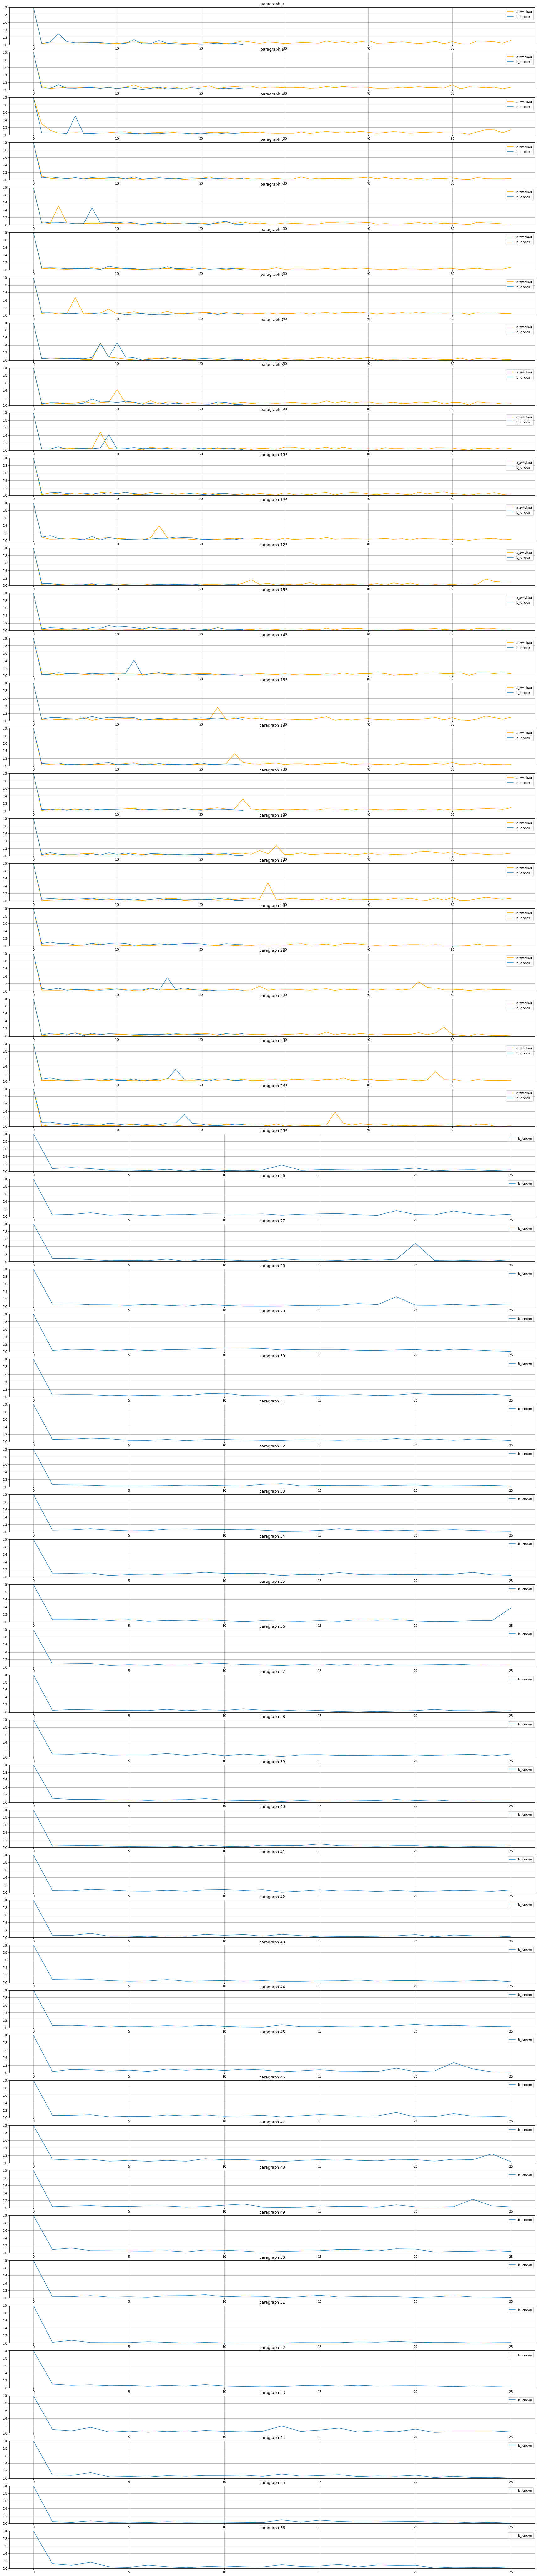

In [354]:
%matplotlib inline
fig, axes = plt.subplots(max(len(london_zwickau_similarities), len(zwickau_london_similarities)), 1, figsize=(30,150))
zwickau_similarities_df = pd.DataFrame(zwickau_london_similarities)
london_similarities_df = pd.DataFrame(london_zwickau_similarities)

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f'paragraph {i}')
    
    if i in list(zwickau_similarities_df.index):
        y_1 = zwickau_similarities_df.iloc[i,:]
        ax.plot(y_1, color='orange', label='a_zwickau')
    
    if i in list(london_similarities_df.index):
        y_2 = london_similarities_df.iloc[i,:]
        ax.plot(y_2, label='b_london')
        
    ax.grid()
    ax.set_ylim([0,1])
    ax.legend()

plt.show()

# XGBOOST

In [355]:
%pip install xgboost

     |████████████████████████████████| 1.7 MB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [393]:
imp.reload(thesisModelFeatures)

<module 'features.model_features' from '../src/features/model_features.py'>

#### original london VS original zwikau

In [388]:
london_vs_zwickau_original_result = thesisModelFeatures.run_models(
    thesisModelFeatures.create_features_df(
        thesisDataReader.get_london_by_new_line_without_words_processing(),
        thesisDataReader.get_zwickau_by_new_line_without_words_processing(),
        None,
        n_gram = (2,5),
        features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
    )
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram
running: XGBClassifier
running: XGBRFClassifier


In [390]:
london_vs_zwickau_original_result[0]

,precision_macro,recall_macro,f1_macro,f1_micro,f1_weighted,accuracy
XGBClassifier,0.624598,0.621400,0.618156,0.621974,0.618424,0.621974
XGBRFClassifier,0.681037,0.661411,0.652360,0.661111,0.652252,0.661111


In [ ]:
london_vs_zwickau_original_greed_search_cv_result = thesisModelFeatures.run_grid_search_cv(    thesisModelFeatures.create_features_df(
        thesisDataReader.get_london_by_new_line_without_words_processing(),
        thesisDataReader.get_zwickau_by_new_line_without_words_processing(),
        None,
        n_gram = (2,5),
        features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
    ), ['XGBClassifier', 'XGBRFClassifier'])

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram
testing classifiers: ['XGBClassifier', 'XGBRFClassifier']
running: XGBClassifier


In [ ]:
london_vs_zwickau_original_greed_search_cv_result

#### london leftovers VS burchard

In [376]:
thesisModelFeatures.run_models(
    thesisModelFeatures.create_features_df(
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_london_poorly_similar_with_chops_corpus(),
            thesisVocabulary.create_london_pre_post_processing_map()
        ))),
        None,
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_burchard_candidate_version_based_on_strongly_similar_london_base(),
            thesisVocabulary.create_london_pre_post_processing_map()
        ))),
        n_gram = (2,5),
        features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
    )
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram
running: XGBClassifier


(               precision_macro  recall_macro  f1_macro  f1_micro  f1_weighted  \
 XGBClassifier         0.765527      0.748452  0.746515  0.761937     0.755004   
 
                accuracy  
 XGBClassifier  0.761937  ,
 [{'fit_time': array([16.50502181, 14.73240805, 14.56113887, 15.04819202, 14.66952896,
          14.71769691, 15.24133873, 15.49403381, 15.21879673, 15.02524686]),
   'score_time': array([0.54690194, 0.67615199, 0.68717003, 0.71097612, 0.659688  ,
          0.69298315, 0.67605424, 0.55876994, 0.64755201, 0.70608306]),
   'test_precision_macro': array([0.88988095, 0.8128655 , 0.64090909, 0.89035088, 0.85833333,
          0.61166667, 0.7875    , 0.74074074, 0.78909091, 0.63392857]),
   'test_recall_macro': array([0.88988095, 0.81845238, 0.63839286, 0.89732143, 0.81994048,
          0.59970238, 0.7875    , 0.68571429, 0.75238095, 0.5952381 ]),
   'test_f1_macro': array([0.88988095, 0.81025641, 0.63915979, 0.89117647, 0.82763975,
          0.59782609, 0.77777778, 0.6875   

#### zwickau leftovers VS burchard

In [377]:
thesisModelFeatures.run_models(
    thesisModelFeatures.create_features_df(
        None,
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_zwickau_poorly_similar_with_chops_corpus(),
            thesisVocabulary.create_zwickau_pre_post_processing_map()
        ))),
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_burchard_candidate_version_based_on_strongly_similar_london_base(),
            thesisVocabulary.create_london_pre_post_processing_map()
        ))),
        n_gram = (2,5),
        features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
    )
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram
running: XGBClassifier


(               precision_macro  recall_macro  f1_macro  f1_micro  f1_weighted  \
 XGBClassifier          0.84681      0.838648  0.839801   0.84303     0.842105   
 
                accuracy  
 XGBClassifier   0.84303  ,
 [{'fit_time': array([14.921736  , 14.22688293, 13.65992379, 14.30002809, 14.44572902,
          13.96600389, 13.87434912, 14.18644691, 14.04899502, 14.09944701]),
   'score_time': array([0.60538602, 0.61695504, 0.53707027, 1.12498498, 0.52385211,
          0.67654037, 0.67742395, 0.65220404, 0.59801292, 0.63890004]),
   'test_precision_macro': array([0.84637681, 0.86153846, 0.79130435, 0.76136364, 0.84210526,
          0.78636364, 0.75877193, 0.92121212, 0.89906832, 1.        ]),
   'test_recall_macro': array([0.83473389, 0.82913165, 0.78151261, 0.75770308, 0.84593838,
          0.77794118, 0.76339286, 0.91369048, 0.88244048, 1.        ]),
   'test_f1_macro': array([0.83806818, 0.83478261, 0.78409091, 0.7589852 , 0.84166667,
          0.7797619 , 0.75604396, 0.9167291

#### london leftovers VS zwickau leftovers

In [378]:
thesisModelFeatures.run_models(
    thesisModelFeatures.create_features_df(
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_london_poorly_similar_with_chops_corpus(),
            thesisVocabulary.create_london_pre_post_processing_map()
        ))),
        list(filter(lambda x: len(x.split()) > 20, thesisVocabulary.create_pre_proceed_corpus_from_processed_corpus(
            thesisDataReader.get_burchard_candidate_version_based_on_strongly_similar_london_base(),
            thesisVocabulary.create_london_pre_post_processing_map()
        ))),
        None,
        n_gram = (2,5),
        features = { 'tfidf', 'inner_mean_cosine_similarity_score' }
    )
)

n_gram_feature_name: 2_5_gram
n_gram_feature_name: 2_5_gram
running: XGBClassifier


(               precision_macro  recall_macro  f1_macro  f1_micro  f1_weighted  \
 XGBClassifier         0.765527      0.748452  0.746515  0.761937     0.755004   
 
                accuracy  
 XGBClassifier  0.761937  ,
 [{'fit_time': array([15.54425192, 14.888062  , 14.54880595, 14.71872115, 14.22980118,
          14.47933578, 14.35553312, 15.44391108, 14.5756669 , 14.31212687]),
   'score_time': array([0.69999719, 0.60672998, 0.67693114, 0.69776201, 0.6765101 ,
          0.69206715, 0.71004701, 0.66679072, 0.57239413, 0.69965911]),
   'test_precision_macro': array([0.88988095, 0.8128655 , 0.64090909, 0.89035088, 0.85833333,
          0.61166667, 0.7875    , 0.74074074, 0.78909091, 0.63392857]),
   'test_recall_macro': array([0.88988095, 0.81845238, 0.63839286, 0.89732143, 0.81994048,
          0.59970238, 0.7875    , 0.68571429, 0.75238095, 0.5952381 ]),
   'test_f1_macro': array([0.88988095, 0.81025641, 0.63915979, 0.89117647, 0.82763975,
          0.59782609, 0.77777778, 0.6875   